# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [2]:
import os
#### Add your code here ####
os.chdir('/content/drive/My Drive/AIML_Project/ACV-Project')
!pwd

/content/drive/My Drive/AIML_Project/ACV-Project


### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [3]:
# IMPORT LIBRARIES AND PACKAGES
import tensorflow as tf
import csv
import numpy as np
from PIL import Image

from keras import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape, Input, Concatenate, UpSampling2D, Dense, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.utils import Sequence
from keras.backend import epsilon

Using TensorFlow backend.


In [0]:
# SETTINGS

DATASET_FOLDER = "/content/drive/My Drive/AIML_Project/ACV-Project/"
images_file = DATASET_FOLDER + "images.npy"

In [0]:
import numpy as np
#data = #### Add your code here ####
data = np.load(images_file, allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (4 marks)

In [6]:
#### Add your code here ####
print(type(data))
print(data.shape)
print(data[0])

<class 'numpy.ndarray'>
(409, 2)
[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)
 list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [9]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [10]:
#### Add your code here ####
print(masks.shape)
len(masks)

(409, 224, 224)


409

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

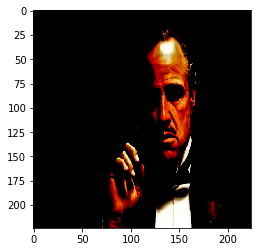

In [11]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

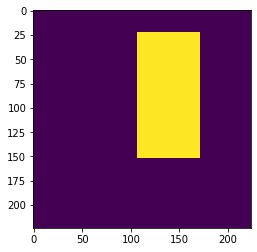

In [12]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
#Install segmentation models
!pip install git+https://github.com/qubvel/segmentation_models
from segmentation_models import Unet, get_preprocessing
from sklearn.model_selection import train_test_split

ALPHA = 1.0

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-lmyqo9rp
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-lmyqo9rp
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0-cp36-none-any.whl size=33585 sha256=a42b940db0a3469fedddeb0ca156bc40e78242220819219e0fac3b67da3c920a
  Stored in directory: /tmp/pip-ephem-wheel-cache-5877nt7p/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models
Segmentation Models: using `keras` framework.


In [0]:
def create_model(trainable=True):
    model1 = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet") #### Add your code here ####
    for layer in model1.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####
    #inp = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    
    block1 = model1.get_layer("conv_pw_5_relu").output
    block2 = model1.get_layer("conv_pw_11_relu").output
    block3 = model1.get_layer("conv_pw_13_relu").output
    #x = model1.layers[-1].output
    
    model2 = Unet(backbone_name='resnet34', encoder_weights='imagenet')
    inp = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
    x = model2(l1)
    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid", name='myconv1')(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)
    #x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    
    model = Model(model1.input, x)
    return model #### Add your code here ####

### Call the create_model function

In [15]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()














Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [0]:
masks2 = np.zeros((int(data.shape[0]), HEIGHT_CELLS, WIDTH_CELLS))
for index in range(data.shape[0]):
  masks2[index] = cv2.resize(masks[index], dsize=(HEIGHT_CELLS, WIDTH_CELLS), interpolation=cv2.INTER_CUBIC)

In [19]:
masks2.shape

(409, 28, 28)

In [0]:
# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, masks2, test_size=0.15, random_state=2019)

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [21]:
#### Add your code here ####
# compile model
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [23]:
#### Add your code here ####
model.fit(X_train,y_train,
    batch_size=1,    
    epochs=10,
    callbacks=[checkpoint,reduce_lr,stop]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
347/347 [==============================] - 5s 16ms/step - loss: 1.3912 - dice_coefficient: 0.4293

Epoch 00001: loss improved from inf to 1.39124, saving model to model-1.39.h5
Epoch 2/10
347/347 [==============================] - 2s 6ms/step - loss: 1.0877 - dice_coefficient: 0.5188

Epoch 00002: loss improved from 1.39124 to 1.08771, saving model to model-1.09.h5
Epoch 3/10
347/347 [==============================] - 2s 6ms/step - loss: 1.0104 - dice_coefficient: 0.5442

Epoch 00003: loss improved from 1.08771 to 1.01041, saving model to model-1.01.h5
Epoch 4/10
347/347 [==============================] - 2s 6ms/step - loss: 0.9869 - dice_coefficient: 0.5531

Epoch 00004: loss improved from 1.01041 to 0.98686, saving model to model-0.99.h5
Epoch 5/10
347/347 [==============================] - 2s 6ms/step - loss: 0.9874 - dice_coefficient: 0.5553

Epoch 00005: loss did not improve 

In [24]:
model.evaluate(X_valid, y_valid, verbose=1)

62/62 [==============================] - 1s 15ms/step


[0.8116758273493859, 0.6312225980143393]

In [25]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

62/62 [==============================] - 0s 2ms/step


### Get the predicted mask for a sample image   (5 marks)

In [26]:
n = 10
sample_image = X_train[n]
sample_image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))
sample_image = np.reshape(sample_image, (1,224,224,3))

sample_image_mask = y_train[n]

#### Add your code here ####

# Predict on sample image
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(sample_image, verbose=1)

1/1 [==============================] - 0s 6ms/step


### Impose the mask on the image (5 marks)

In [0]:
#### Add your code here ####
import matplotlib.pyplot as plt
def plot_sample(X, y, preds, ix=None):
    if ix is None:
        ix = np.random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='hot')
    if has_mask:
        ax[0].contour(y[ix].squeeze())
    ax[0].set_title('Actual')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Mask')

    ax[2].imshow(preds[ix].squeeze())
    if has_mask:
        ax[2].contour(preds[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Mask Predicted')

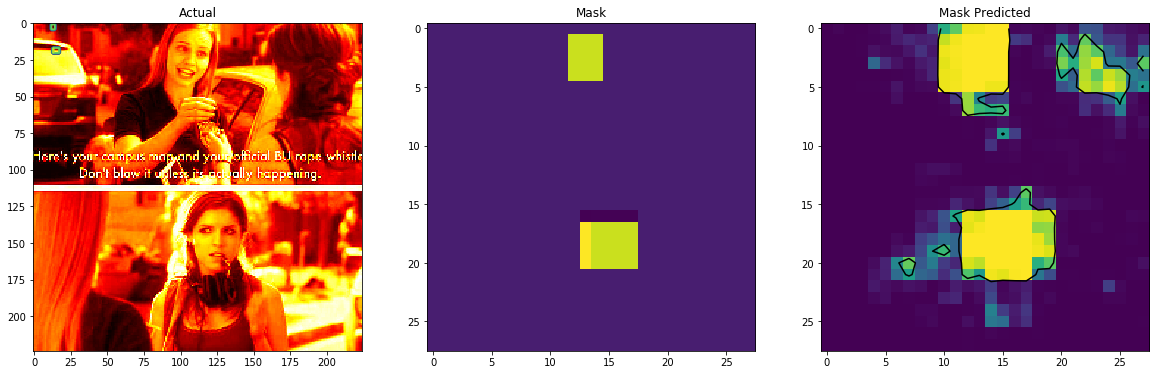

In [28]:
# Check if data looks all right
#plot_sample(X_train, masks, preds_train)
plot_sample(X_train, y_train, preds_train)